## Combining and Merging Data Sets

Data contained in pandas objects can be combined together in a number of built-in
ways:
1. **pandas.merge** connects rows in DataFrames based on one or more keys. This will be familiar to users of SQL or other relational databases, as it implements database join operations.
2. **pandas.concat** glues or stacks together objects along an axis.
3. **combine_first** instance method enables splicing together overlapping data to fill in missing values in one object with values from another.

### Database-style DataFrame Merges

*Merge* or *join* operations combine data sets by linking rows using one or more keys.

Merge on **single** column:

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [2]:
df1 = DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"],
                 "data1": range(7)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [3]:
df2 = DataFrame({"key": ["a", "b", "d"],
                 "data2": range(3)})
df2

,data2,key
0,0,a
1,1,b
2,2,d


This is an example of a *many-to-one* merge situation; the data in df1 has *multiple* rows labeled a and b, whereas df2 has *only one* row for each value in the key column.

In [4]:
pd.merge(df1, df2, on="key") # Default behavior is merging on all overlapping columns 

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


Explicitly specify columns to join on:

In [5]:
df3 = DataFrame({"lkey": ["b", "b", "a", "c", "a", "a", "b"],
                 "data1": range(7)})
df3

,data1,lkey
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [6]:
df4 = DataFrame({"rkey": ["a", "b", "d"],
                 "data2": range(3)})
df4

,data2,rkey
0,0,a
1,1,b
2,2,d


In [7]:
pd.merge(df3, df4, left_on="lkey", right_on="rkey") # Default: INNER JOIN

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [8]:
pd.merge(df1, df2, how="outer") # OUTER JOIN

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [9]:
df1 = DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                 "data1": range(6)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [10]:
df2 = DataFrame({"key": ["a", "b", "a", "b", "d"],
                 "data2": range(5)})
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [11]:
pd.merge(df1, df2, on="key", how="left") # LEFT JOIN

,data1,key,data2
0,0,b,1.0
1,0,b,3.0
2,1,b,1.0
3,1,b,3.0
4,2,a,0.0
5,2,a,2.0
6,3,c,NaN
7,4,a,0.0
8,4,a,2.0
9,5,b,1.0


To merge with **multiple keys**, pass a list of column names:

In [12]:
left = DataFrame({"key1": ["foo", "foo", "bar"],
                  "key2": ["one", "two", "one"],
                  "lval": [1, 2, 3]})
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [13]:
right = DataFrame({"key1": ["foo", "foo", "bar", "bar"],
                   "key2": ["one", "one", "one", "two"],
                   "rval": [4, 5, 6, 7]})
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [14]:
pd.merge(left, right, on=["key1", "key2"], how="outer")

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


**When joining column(s)-on-column(s), the indexes on the passed Data-Frame objects are discarded.**

**Join when there are overlapping column names:**

In [15]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [16]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [17]:
pd.merge(left, right, on="key1")

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [18]:
pd.merge(left, right, on="key1", suffixes=("_left", "_right"))

# Tuple of string values to append to column names in case of overlap; defaults to ('_x', '_y') . 
# For example, if 'data' in both DataFrame objects, would appear as 'data_x' and 'data_y' in result

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Merging on Index

In some cases, the merge key or keys in a DataFrame will be found in its index.

In [19]:
left1 = DataFrame({"key": ["a", "b", "a", "a", "b", "c"],
                   "value": range(6)})
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [20]:
right1 = DataFrame({"group_val": [3.5, 7]}, index=["a", "b"])
right1

,group_val
a,3.5
b,7.0


In [21]:
pd.merge(left1, right1, left_on="key", right_index=True)
# Pass left_index=True or right_index=True (or both) to indicate that the index should be used as the merge key 

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [22]:
pd.merge(left1, right1, left_on="key", right_index=True, how="outer") # OUTER JOIN

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


**Join on hierachical index**

In [23]:
lefth = DataFrame({"key1": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada"],
                   "key2": [2000, 2001, 2002, 2001, 2002],
                   "data": np.arange(5.)})
lefth

,data,key1,key2
0,0.0,Ohio,2000
1,1.0,Ohio,2001
2,2.0,Ohio,2002
3,3.0,Nevada,2001
4,4.0,Nevada,2002


In [24]:
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[["Nevada", "Nevada", "Ohio", "Ohio", "Ohio", "Ohio"],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=["event1", "event2"])
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [25]:
pd.merge(lefth, righth, left_on=["key1", "key2"], right_index=True) 
#indicate multiple columns to merge on as a list

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4,5
0,0.0,Ohio,2000,6,7
1,1.0,Ohio,2001,8,9
2,2.0,Ohio,2002,10,11
3,3.0,Nevada,2001,0,1


**Merge using the indexes of both sides**:

In [26]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=["a", "c", "e"],
                  columns=["Ohio", "Nevada"])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [27]:
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=["b", "c", "d", "e"], columns=["Missouri", "Alabama"])
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [28]:
pd.merge(left2, right2, how="outer", left_index=True, right_index=True) # OUTER JOIN

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


Join using **join** instance method:

**Combine together many DataFrame objects having the same or similar indexes but non-overlapping columns.**

In [29]:
left2.join(right2, how="outer")

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [30]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [31]:
right1

,group_val
a,3.5
b,7.0


The default behavior of df1.**join**(df2) is to left-join df1 and df2 on their common index. Or use column(s) of df1 (use "on=" to specify) to join on the index of df2:

In [32]:
left1.join(right1, on="key")

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


For simple **index-on-index** merges, you can pass a list of DataFrames to join:

In [33]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [34]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [35]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [36]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [37]:
left2.join([right2, another], how="outer") # OUTER

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


## Concatenating Along an Axis

**concatenate** in NumPy

In [38]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

Suppose we have three Series with no index overlap:

In [40]:
s1 = Series([0, 1], index=["a", "b"])
s2 = Series([2, 3, 4], index=["c", "d", "e"])
s3 = Series([5, 6], index=["f", "g"])

By default **concat** stacks FataFrames/Series horizontally (**axis**=0)

In [41]:
pd.concat([s1, s2 ,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

If there is no overlap on the index, the result is equivalent to **Outer Join** on the index:

In [42]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


Do **Inner Join** when there is overlap on the index:

In [43]:
s4 = pd.concat([s1 * 5, s3])
s4

a    0
b    5
f    5
g    6
dtype: int64

In [44]:
pd.concat([s1, s4], axis=1) # Default: OUTER JOIN

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [45]:
pd.concat([s1, s4], axis=1, join="inner") # INNER JOIN

,0,1
a,0,0
b,1,5


**Specify on what index values to join**:

In [46]:
s1

a    0
b    1
dtype: int64

In [47]:
s4

a    0
b    5
f    5
g    6
dtype: int64

In [48]:
pd.concat([s1, s4], axis=1, join_axes=[["a", "c", "b", "e"]])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


Create hierachical index to identify pieces (use **key=**):

In [49]:
s1

a    0
b    1
dtype: int64

In [50]:
s3

f    5
g    6
dtype: int64

In [51]:
result = pd.concat([s1, s1, s3], keys=["one", "two", "three"])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

Use **unstack** to move the innermost level of hierachical index (axis=0) to columns (axis=1):

In [52]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


**keys** become DataFrame column for **axis=1**

In [53]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [54]:
pd.concat([s1, s2, s3], axis=1, keys=["one", "two", "three"])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


Same logic for **DataFrame** objects:

In [55]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=["a", "b", "c"],
                columns=["one", "two"])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [56]:
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=["a", "c"],
                columns=["three", "four"])
df2

,three,four
a,5,6
c,7,8


In [57]:
pd.concat([df1, df2], axis=1, keys=["level1", "level2"])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

If you pass a dict of objects instead of a list, the dict’s keys will be used for the **keys** option:

In [58]:
pd.concat({"level1": df1, "level2": df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

**Name the axes**:

In [59]:
pd.concat([df1, df2], axis=1, keys=["level1", "level2"],
          names=["upper", "lower"])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

**Ignore index**: concatenate the DataFrame/Series without performing joins (use **ignore_index=True**)

In [60]:
df1 = DataFrame(np.random.randn(3, 4), columns=["a", "b", "c", "d"])
df1

,a,b,c,d
0,-1.280167,0.656840,-2.187739,-2.187804
1,0.550113,1.191949,-1.556372,-0.988927
2,-1.398577,-0.857369,0.830940,-0.247503


In [61]:
df2 = DataFrame(np.random.randn(2, 3), columns=["b", "d", "a"])
df2

,b,d,a
0,-1.333031,1.774671,-0.400677
1,-1.604103,1.398072,-1.168984


In [62]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-1.280167,0.656840,-2.187739,-2.187804
1,0.550113,1.191949,-1.556372,-0.988927
2,-1.398577,-0.857369,0.830940,-0.247503
3,-0.400677,-1.333031,NaN,1.774671
4,-1.168984,-1.604103,NaN,1.398072


### Combining Data With Overlap

pandas' equivalent of NumPy's **where** function (vectorized if-else):

In [63]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=["f", "e", "d", "c", "b", "a"])
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [64]:
b = Series(np.arange(len(a), dtype=np.float64),
           index=["f", "e", "d", "c", "b", "a"])
b[-1] = np.nan
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [65]:
np.where(pd.isnull(a), b, a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [66]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

df1.**combine_first**(df2): "patching" missing data in df1 with data from df2

In [67]:
df1 = DataFrame({"a": [1., np.nan, 5., np.nan],
                 "b": [np.nan, 2., np.nan, 6.],
                 "c": range(2, 18, 4)})
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [68]:
df2 = DataFrame({"a": [5., 4., np.nan, 3., 7.],
                 "b": [np.nan, 3., 4., 6., 8.]})
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [69]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Reshaping and Pivoting

### Reshaping with Hierachical Indexing

Two primary actions on hierachically indexed DataFrame:
1. **stack**: pivots from the **columns** to the **rows**
2. **unstack**: piviots from the **rows** to the **columns**

In [70]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(["Ohio", "Colorado"], name="state"),
                 columns=pd.Index(["one", "two", "three"], name="number"))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [71]:
result = data.stack() # produced a Series
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [72]:
result.unstack() # back to the original DataFrame

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


By default the innermost level is **unstack()**ed (or **stack()**ed). Unstack a different level by passing a level number or name:

In [73]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [74]:
result.unstack("state")

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


Unstacking might introduce missing data if all of the values in the level aren't found in each of the subgroups:

In [75]:
s1 = Series([0, 1, 2, 3], index=["a", "b", "c", "d"])
s1

a    0
b    1
c    2
d    3
dtype: int64

In [76]:
s2 = Series([4, 5, 6], index=["c", "d", "e"])
s2

c    4
d    5
e    6
dtype: int64

In [77]:
data2 = pd.concat([s1, s2], keys=["one", "two"])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [78]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


By default, stacking filters out missing data:

In [79]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [80]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

When unstacking in a DataFrame, the level unstacked becomes the **lowest level** in other axis(column or index):

In [81]:
df = DataFrame({'left': result, 'right': result + 5},
               columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [82]:
df.unstack("state")

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [83]:
df.unstack("state").stack("side")

state         Ohio  Colorado
number side                 
one    left      0         3
       right     5         8
two    left      1         4
       right     6         9
three  left      2         5
       right     7        10

### Pivoting "long" to "wide" Format

A common way to store multiple time series ("realgdp", "infl", "unemp") in databases is on so-called *long* or *stacked* format:

In [84]:
import datetime

date = pd.to_datetime(pd.Series((["1959-03-31"] * 3) +
                                (["1959-06-30"] * 3) +
                                (["1959-09-30"] * 3) +
                                (["1959-12-31"] * 3)))
item = Series(["realgdp", "infl", "unemp"] * 4)
value = Series([2710.349, 0., 5.8, 2778.801, 2.34, 5.1, 2775.488, 2.74, 5.3, 2785.204, 0.27, 5.6])

ldata = DataFrame({"date": date, "item": item, "value": value})
ldata

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


(**date**, **item**) is the primary key in the table

Transform it into DataFrame containing one column per distinct **item** value indexded by timestamps in the **date** column, using **pivot** method:

In [85]:
pivoted = ldata.pivot("date", "item", "value")
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6


The first two values (**date**, **item**) passed are the columns to be used as the row and column index, and finally an optional value column to fill the DataFrame.

Suppose you had two value columns that you wanted to reshape simultaneously:

In [86]:
ldata["value2"] = np.random.randn(len(ldata))

In [87]:
ldata

,date,item,value,value2
0,1959-03-31,realgdp,2710.349,1.395615
1,1959-03-31,infl,0.000,1.037795
2,1959-03-31,unemp,5.800,1.158117
3,1959-06-30,realgdp,2778.801,0.960020
4,1959-06-30,infl,2.340,-0.099933
5,1959-06-30,unemp,5.100,-0.908509
6,1959-09-30,realgdp,2775.488,0.210815
7,1959-09-30,infl,2.740,-0.492581
8,1959-09-30,unemp,5.300,0.476830
9,1959-12-31,realgdp,2785.204,-0.051999


By omitting the last argument, all other columns (**value** and **value2**) are used to fill the DataFrame:

In [88]:
pivoted = ldata.pivot("date", "item")
pivoted[:5]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8  1.037795  1.395615  1.158117
1959-06-30  2.34  2778.801   5.1 -0.099933  0.960020 -0.908509
1959-09-30  2.74  2775.488   5.3 -0.492581  0.210815  0.476830
1959-12-31  0.27  2785.204   5.6  2.334434 -0.051999  1.065734

In [89]:
pivoted["value"][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6


Break down **pivot** into 
1. Create a hierachical index using **set_index()**
2. Reshape with **unstack()**

In [90]:
ldata.set_index(["date", "item"])

value    value2
date       item                       
1959-03-31 realgdp  2710.349  1.395615
           infl        0.000  1.037795
           unemp       5.800  1.158117
1959-06-30 realgdp  2778.801  0.960020
           infl        2.340 -0.099933
           unemp       5.100 -0.908509
1959-09-30 realgdp  2775.488  0.210815
           infl        2.740 -0.492581
           unemp       5.300  0.476830
1959-12-31 realgdp  2785.204 -0.051999
           infl        0.270  2.334434
           unemp       5.600  1.065734

In [91]:
unstacked = ldata.set_index(["date", "item"]).unstack("item")
unstacked

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8  1.037795  1.395615  1.158117
1959-06-30  2.34  2778.801   5.1 -0.099933  0.960020 -0.908509
1959-09-30  2.74  2775.488   5.3 -0.492581  0.210815  0.476830
1959-12-31  0.27  2785.204   5.6  2.334434 -0.051999  1.065734

## Data Transformation

### Removing Duplicates

In [92]:
data = DataFrame({"k1": ["one"] * 3 + ["two"] * 4,
                  "k2": [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


The DataFrame method **duplicated** returns a boolean Series indicating whether each row is a duplicate or not:

In [93]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

**drop_duplicates** returns a DataFrame where the duplicated array is True:

In [94]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


**duplicated()** and **drop_duplicates()** by default consider all of the columns; alternatively you can specify any subset of them to detect duplicates.

In [95]:
data["v1"] = range(7)
data

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [96]:
data.drop_duplicates(["k1"])

,k1,k2,v1
0,one,1,0
3,two,3,3


**duplicated()** and **drop_duplicates()** by default keeps the first observed value combination. Use **keep="last"** will return the last one:

In [97]:
data.drop_duplicates(["k1", "k2"], keep="last")

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


### Transforming Data Using a Function or Mapping

For many data sets, you may wish to perform some transformation based on the values in an array, Series, or column in a DataFrame.

In [98]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [99]:
meat_to_animal = {
    "bacon": "pig",
    "pulled pork": "pig",
    "pastrami": "cow",
    "corned beef": "cow",
    "honey ham": "pig",
    "nova lox": "salmon"
    }

In [100]:
data["food"].map(str.lower).map(meat_to_animal) # chaining multiple map functions

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

data["food"].map(lambda x: meat_to_animal[x.lower()]) # using lambda function

Using **map** to perform element-wise transformations and other data cleaning-related operations.

### Replacing Values

Filling in missing data with **fillna** was a special case of element-wise replacement operation.

**replace** provides more flexible way to do it.

In [101]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [102]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

To **replace multiple values** at once, pass a list:

In [103]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

To use **a different replacement for each value**, pass a list of substitutes:

In [104]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [105]:
data.replace({-999: np.nan, -1000: 0}) # Pass a dict

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Renaming Axis Indexes

In [106]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=["Ohio", "Colorado", "New York"],
                 columns=["one", "two", "three", "four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


Use the **map** method in the axis index:

In [107]:
data.index.map(str.upper)

array(['OHIO', 'COLORADO', 'NEW YORK'], dtype=object)

In [108]:
data.index = data.index.map(str.upper)
data # Modify the DataFrame in place

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


Use **rename** to create a transformed version of a dataset without modifying the original:

In [109]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


Pass a dict-like object to replace axis label names:

In [110]:
data.rename(index={"OHIO": "INDIANA"}, columns={"three": "peekaboo"})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [111]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True) # Modify in place
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


### Discretization and Binning

In [112]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
type(cats)

pandas.core.categorical.Categorical

In [113]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [114]:
cats.codes # indicating distince category names

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [115]:
cats.categories

Index([u'(18, 25]', u'(25, 35]', u'(35, 60]', u'(60, 100]'], dtype='object')

In [116]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

Consistent with mathematical notation for intervals, a parenthesis means that the side is **open** while the square bracket means it is **closed** (inclusive). Which side is closed can be changed by passing **right=False**

In [117]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, object): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

Pass user-fined **bin names**:

In [118]:
group_names = ["Youth", "YoungAdult", "MiddleAged", "Senior"]

In [119]:
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

**If you pass cut a integer number of bins instead of explicit bin edges, it will compute equal-length bins based on the minimum and maximum values in the data.**

In [120]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.27, 0.51], (0.75, 0.99], (0.75, 0.99], (0.03, 0.27], (0.27, 0.51], ..., (0.27, 0.51], (0.75, 0.99], (0.75, 0.99], (0.03, 0.27], (0.03, 0.27]]
Length: 20
Categories (4, object): [(0.03, 0.27] < (0.27, 0.51] < (0.51, 0.75] < (0.75, 0.99]]

A closely related function, **qcut**, bins the data based on sample quantiles. Since **qcut** uses sample quantiles instead, by definition
you will obtain roughly equal-size bins:

In [121]:
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # Cut into quartiles
cats

[(0.615, 3.248], [-3.574, -0.689], [-3.574, -0.689], (-0.689, -0.0773], [-3.574, -0.689], ..., [-3.574, -0.689], (0.615, 3.248], (0.615, 3.248], (0.615, 3.248], (0.615, 3.248]]
Length: 1000
Categories (4, object): [[-3.574, -0.689] < (-0.689, -0.0773] < (-0.0773, 0.615] < (0.615, 3.248]]

In [122]:
pd.value_counts(cats)

(0.615, 3.248]       250
(-0.0773, 0.615]     250
(-0.689, -0.0773]    250
[-3.574, -0.689]     250
dtype: int64

**Pass used-defined own quantiles (numbers between 0 and 1, inclusive)**:

In [123]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-0.0773, 1.263], [-3.574, -1.193], (-1.193, -0.0773], (-1.193, -0.0773], [-3.574, -1.193], ..., (-1.193, -0.0773], (-0.0773, 1.263], (-0.0773, 1.263], (-0.0773, 1.263], (-0.0773, 1.263]]
Length: 1000
Categories (4, object): [[-3.574, -1.193] < (-1.193, -0.0773] < (-0.0773, 1.263] < (1.263, 3.248]]

### Detecting and Filtering Outliers

In [124]:
np.random.seed(12345)

data = DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


Find values in one of the columns exceeding three in magnitude:

In [125]:
col = data[3]

col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

Select all rows having a value exceeding 3 or -3:

In [126]:
data[(np.abs(data) > 3).any(axis=1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


"Broadcast" assignment based on selectoin criteria

In [127]:
data[np.abs(data) > 3] = np.sign(data) * 3

In [128]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


### Permutation and Random Sampling

In [129]:
df = DataFrame(np.arange(5 * 4).reshape(5, 4))

sampler = np.random.permutation(5)
sampler

array([1, 0, 2, 3, 4])

Obtain df with permutated rows using **ix** or **take()**

In [130]:
df.ix[sampler, :]

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [131]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


Select a random subset without replacement: slice off the first **k** elements of the array returned by **permutation**

In [132]:
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19


Generate sample **with** replacement:

In [133]:
bag = np.array([5, 7, -1, 6, 4])

sampler = np.random.randint(0, len(bag), size=10)
sampler

array([4, 4, 2, 2, 2, 0, 3, 0, 4, 1])

In [134]:
draws = bag.take(sampler)
draws

array([ 4,  4, -1, -1, -1,  5,  6,  5,  4,  7])

### Computing Indicator/Dummy Variables

Compute **one-hot encodings** for categorical variables:

In [135]:
df = DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                "data1": range(6)})
df

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [136]:
pd.get_dummies(df["key"])

,a,b,c
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0


Add a **prefix** to columns in the indicator DataFrame:

In [137]:
dummies = pd.get_dummies(df["key"], prefix="key")

In [138]:
pd.concat([df["data1"], dummies], axis=1)

,data1,key_a,key_b,key_c
0,0,0.0,1.0,0.0
1,1,0.0,1.0,0.0
2,2,1.0,0.0,0.0
3,3,0.0,0.0,1.0
4,4,1.0,0.0,0.0
5,5,0.0,1.0,0.0


In [139]:
df[["data1"]].join(dummies)

,data1,key_a,key_b,key_c
0,0,0.0,1.0,0.0
1,1,0.0,1.0,0.0
2,2,1.0,0.0,0.0
3,3,0.0,0.0,1.0
4,4,1.0,0.0,0.0
5,5,0.0,1.0,0.0


**More complicated example**:

a row in a DataFrame belongs to multiple categories

In [140]:
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("movies.dat", sep="::",
                       header=None, names=mnames,
                       engine="python")

movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [141]:
genre_iter =  [set(x.split("|")) for x in movies.genres]

In [142]:
genres = sorted(set.union(*genre_iter))
genres
# OR reduce(lambda x, y: x | y, genre_iter)

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

Initialize an indicator DataFrame with zeros:

In [143]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)

Iterate through each movie and set entries in each row of dummies to 1:

In [144]:
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split("|")] = 1
dummies.head()    

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Combine **dummies** with **movies**

In [145]:
movies_windic = movies.join(dummies.add_prefix("Genre_"))

movies_windic.ix[0, :]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

Another **usecase**: combining **get_dummies** with discretization function **cut**

In [146]:
values = np.random.rand(10)
values

array([ 0.75603383,  0.90830844,  0.96588737,  0.17373658,  0.87592824,
        0.75415641,  0.163486  ,  0.23784062,  0.85564381,  0.58743194])

In [147]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [148]:
pd.cut(values, bins)

[(0.6, 0.8], (0.8, 1], (0.8, 1], (0, 0.2], (0.8, 1], (0.6, 0.8], (0, 0.2], (0.2, 0.4], (0.8, 1], (0.4, 0.6]]
Categories (5, object): [(0, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.8] < (0.8, 1]]

In [149]:
pd.get_dummies(pd.cut(values, bins))

,"(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1]"
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0


## String Manipulation
### String Object Methods

In [150]:
val = "a,b, guido"
val.split(",")

['a', 'b', ' guido']

**split** is often combined with **strip** to trim whitespace (including newlines):

In [151]:
pieces = [x.strip() for x in val.split(",")]
pieces

['a', 'b', 'guido']

In [152]:
"::".join(pieces)

'a::b::guido'

Using Python's **in** keyword is the best way to detect a substring, though **index** and **find** can also be used:

In [153]:
"guido" in val

True

In [154]:
val.index(",")

1

In [155]:
val.find(":")

-1

1. **find()** always returns a value (-1, if not found)
2. **index()** raises an exception if not found

**count()** returns the number of occurrences of a particular substring:

In [156]:
val.count(",")

2

**replace()** substitutes occurrences of one string for another:

In [157]:
val.replace(",", "::")

'a::b:: guido'

In [158]:
val.replace(",", "")

'ab guido'

### Regular expressions
The python **re** module functions fall into three categories:
1. pattern matching
2. substitution
3. splitting

Split a string with a variable number of whitespace characters(tabs, spaces, newlines)

In [159]:
import re

In [160]:
text = "foo    bar\t baz  \tqux"

re.split(r"\s+", text)

['foo', 'bar', 'baz', 'qux']

Compile a regex with **re.compile** so it can be reused:

In [161]:
regex = re.compile("\s+")

In [162]:
regex.split(text) # same result as re.split(r"\s+", text)

['foo', 'bar', 'baz', 'qux']

Get a list of all patterns matching the regex, use **findall()**

In [163]:
regex.findall(text)

['    ', '\t ', '  \t']

**Tip**: to avoid unwanted escaping with \ in a regular expression, use raw string literals like **r'C:\x'** instead of the equivalent **'C:\\x'**.

**match()**, **search()**, **findall()**:

1. **findall()** returns all matches in a string
2. **search()** returns only the first match
3. **match()** only matches at the beginning of the string

**Usecase**: use regex to identify email addresses:

In [164]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""

pattern = r"[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}"

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [165]:
# 1. findall()

regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

**search()** returns a special match object for the first email. The match object can only tell us the start and end position of the pattern in the string:

In [166]:
# 2. search()
m = regex.search(text)

m

In [167]:
text[m.start():m.end()]

'dave@google.com'

**regex.match** returns **None**, as it only will match if the pattern occurs at the start of the string:

In [168]:
# 3. match()
print regex.match(text)

None


**sub** will return a new string with occurrences of the pattern replaced by the a new string:

In [169]:
regex.sub("REDACTED", text)

'Dave REDACTED\nSteve REDACTED\nRob REDACTED\nRyan REDACTED\n'

Suppose you wanted to find email addresses and simultaneously segment each address into its 3 components: **username**, **domain name**, and **domain suffix**. 

To do this, **put parentheses around the parts of the pattern to segment**:

In [170]:
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"

regex = re.compile(pattern, flags=re.IGNORECASE)

A match object produced by this modified regex returns a tuple of the pattern components with its **groups()** method:

In [171]:
m = regex.match("wesm@bright.net")

m.groups()

('wesm', 'bright', 'net')

**findall()** returns a list of tuples when the pattern has groups:

In [172]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

**sub()** also has access to groups in each match using special symbols like **\1**, **\2**, etc.:

In [173]:
print regex.sub(r"Username: \1, Domain: \2, Suffix: \3", text)

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



One **variation** on the above email regex gives names to the match groups:

In [174]:
regex = re.compile(r"""
    (?P<AAA>[A-Z0-9._%+-]+)
    @
    (?P<BBB>[A-Z0-9.-]+)
    \.
    (?P<CCC>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)
m = regex.match("wesm@bright.net")

m.groupdict()

{'AAA': 'wesm', 'BBB': 'bright', 'CCC': 'net'}

### Vectorized string functions in pandas

In [175]:
data = {"Dave": "dave@google.com", "Steve": "steve@gmail.com",
        "Rob": "rob@gmail.com", "Wes": np.nan}
data= Series(data)
data

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [176]:
data.isnull()

Dave     False
Rob      False
Steve    False
Wes       True
dtype: bool

String and regular expression methods can be applied (passing a **lambda** or other function) to each value using **data.map**, but it will **fail on the NA**.

To cope with this, Series has concise methods for string operations that skip NA values. These are accessed through Seriess **str** attribute:

In [177]:
data.str.contains("gmail")

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

Regular expressions can be used, too, along with any re options like **IGNORECASE**:

In [178]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [179]:
allmatches = data.str.findall(pattern, flags=re.IGNORECASE) # Series
allmatches

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [180]:
matches = allmatches.map(lambda x: x[0] if type(x) is list else x)
matches

Dave     (dave, google, com)
Rob        (rob, gmail, com)
Steve    (steve, gmail, com)
Wes                      NaN
dtype: object

In [181]:
matches.str.get(1)

Dave     google
Rob       gmail
Steve     gmail
Wes         NaN
dtype: object

In [182]:
matches.str[1]

Dave     google
Rob       gmail
Steve     gmail
Wes         NaN
dtype: object

## Example: USDA Food Database

In [183]:
import json

db = json.load(open("foods-2011-10-03.json"))
len(db)

6636

Each entry in **db** is a dict containing all the data for a single food. The **'nutrients'** field is a list of dicts, one for each nutrient:

In [184]:
db[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [185]:
db[0]["nutrients"][0]

{u'description': u'Protein',
 u'group': u'Composition',
 u'units': u'g',
 u'value': 25.18}

In [186]:
nutrients = DataFrame(db[0]["nutrients"])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


When converting a list of dicts to a DataFrame, we can **specify a list of fields** to extract. We'll take the food names, group, id, and manufacturer:

In [187]:
info_keys = ["description", "group", "id", "manufacturer"]
info = DataFrame(db, columns=info_keys)

In [188]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


Check the distribution of food groups with **value_counts()**:

In [189]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

Assemble the nutrients for each food into a **single large table**:

1. Convert each list of food nutrients to a DataFrame, add a column for the food **id**, and append the DataFrame (**fnuts**) to a list.
2. Concatenate them together with **concat()**

In [190]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)
    
nutrients = pd.concat(nutrients, ignore_index=True)
nutrients.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


Remove **duplicated** rows:

In [191]:
nutrients.shape

(389355, 5)

In [192]:
nutrients.duplicated().sum()

14179

In [193]:
nutrients = nutrients.drop_duplicates()
nutrients.shape

(375176, 5)

**Rename column names to make them descriptive**:

In [194]:
col_mapping = {"description": "food", "group": "fgroup"}
info = info.rename(columns=col_mapping, copy=False)

info.head()

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [195]:
col_mapping = {"description" : "nutrient", "group": "nutgroup"}

nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.head()

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


**Join** **nutrients** and **info** on **id**:

In [196]:
ndata = pd.merge(nutrients, info, on="id", how="outer")
ndata.head()

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


**Plot of median values by food group and nutrient type**:

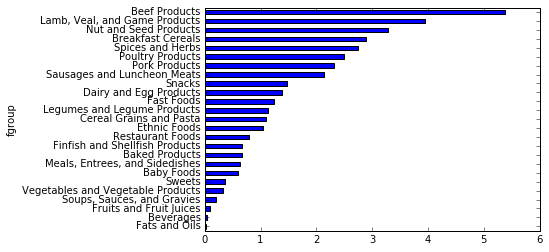

In [197]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result["Zinc, Zn"].sort_values().plot(kind="barh")
import matplotlib.pyplot as plt
plt.show()

**Find which food is most dense in each nutrient**:

In [198]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smarller
max_foods.food = max_foods.food.str[:50]

The resulting DataFrame is a bit too large to display in the book; here is just the 'Amino Acids' nutrient group:

In [199]:
max_foods.ix["Amino Acids"]["food"]

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 